# Digital Image Processing Exercise 4_1

Dr. Rahmati

By: Gholamreza Dar

Summer 2022

In [2]:
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns; sns.set(); sns.set_style('dark')

import cv2


In [3]:

## Functions
def rgb(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

def bgr(img):
    return cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

def gray(img):
    return cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

def uint8ify(img):
    img -= img.min()
    img /= img.max()
    img *= 255
    return np.uint8(img)

def overlay(a,b):
    # a and b should be float images and between 0-1

    mask = a >= 0.5 # generate boolean mask of everywhere a > 0.5 
    ab = np.zeros_like(a) # generate an output container for the blended image 

    # now do the blending 
    ab[~mask] = (2*a*b)[~mask] # 2ab everywhere a<0.5
    ab[mask] = (1-2*(1-a)*(1-b))[mask] # else this
    
    return ab

def disp(img, title='', s=8, vmin=None, vmax=None):
    plt.figure()
    plt.axis('off')
    if vmin is not None and vmax is not None:
        plt.imshow(img, cmap='gray', vmin=vmin, vmax=vmax)
    else:
        plt.imshow(img, cmap='gray')
    plt.title(title)
    plt.show()
    
def before_after(img_a, img_b, name="", vmin=None, vmax=None, effect_name="Processed"):
    fig, axs = plt.subplots(1,2, constrained_layout=True, figsize=(10,4))
    axs[0].axis('off')
    axs[1].axis('off')
    axs[0].set_title(f"{name} Original")
    axs[1].set_title(f"{name} {effect_name}")
    if vmin is not None and vmax is not None:
        axs[0].imshow(img_a, cmap='gray', vmin=vmin, vmax=vmax)
        axs[1].imshow(img_b, cmap='gray', vmin=vmin, vmax=vmax)
    else:
        axs[0].imshow(img_a, cmap='gray')
        axs[1].imshow(img_b, cmap='gray')
    plt.show()


## Loading Images

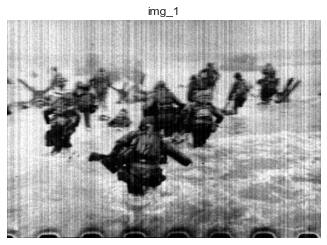

In [4]:
## Loading Images
img_1 = cv2.imread('inputs/P1/the_magnificent_eleven_1.png', 0).astype(np.float32)
img_1_mask = cv2.imread('inputs/P1/the_magnificent_eleven_1_mask.png', 0).astype(np.float32)
img_1_inpaint_ps = cv2.imread('inputs/P1/img_1_inpaint_ps.png', 0).astype(np.float32)
img_1_fourier_mask = cv2.imread('inputs/P1/the_magnificent_eleven_1_fourier_mask.png', 0).astype(np.float32)
img_2 = cv2.imread('inputs/P1/the_magnificent_eleven_2.png', 0).astype(np.float32)
img_2_mask = cv2.imread('inputs/P1/the_magnificent_eleven_2_mask.png', 0).astype(np.float32)
img_3 = cv2.imread('inputs/P1/the_magnificent_eleven_3.png', 0).astype(np.float32)
img_4 = cv2.imread('inputs/P1/the_magnificent_eleven_4.png', 0).astype(np.float32)
img_5 = cv2.imread('inputs/P1/the_magnificent_eleven_5.png', 0).astype(np.float32)
img_5_ps = cv2.imread('inputs/P1/the_magnificent_eleven_5_psed.png', 0).astype(np.float32)
img_5_ps2 = cv2.imread('inputs/P1/the_magnificent_eleven_5_psed3.png', 0).astype(np.float32)
img_6 = cv2.imread('inputs/P1/the_magnificent_eleven_6.png', 0).astype(np.float32)
img_6_mask = cv2.imread('inputs/P1/the_magnificent_eleven_6_mask.png', 0).astype(np.float32)

disp(img_1, 'img_1')

## img 1

In [5]:
# Fourier analysis, inpaint
# disp(img_1, "Image 1 Original")
# inpaint image using a mask
def fourier_analysis(img):
    fourier_img = cv2.dft(img.astype(np.float32), flags=cv2.DFT_COMPLEX_OUTPUT)
    fourier_img_shift = np.fft.fftshift(fourier_img)
    real = fourier_img_shift[:,:,0]
    imag = fourier_img_shift[:,:,1]
    magnitude = cv2.magnitude(real, imag)
    phase = cv2.phase(real, imag)
    return magnitude, phase

def apply_fourier_filter(img, mask):
    mask = mask[:, :, np.newaxis]
    img_fourier = cv2.dft(img.astype(np.float32), flags=cv2.DFT_COMPLEX_OUTPUT)
    img_fourier_shift = np.fft.fftshift(img_fourier)
    img_fourier_shift *= mask
    img_fourier_shift_back = np.fft.ifftshift(img_fourier_shift)
    img_fourier_inverse = cv2.idft(img_fourier_shift_back, flags=cv2.DFT_SCALE)

    return img_fourier_inverse

magnitude, phase = fourier_analysis(img_1)
mag_viz = np.log(magnitude)
mag_viz -= mag_viz.min()+4
mag_viz /= mag_viz.max()
# mag_viz = cv2.equalizeHist(mag_viz.astype(np.uint8))
cv2.imwrite("mag2.exr", mag_viz)
# cv2.imwrite("mag2.png", mag_viz)
disp(mag_viz, vmin=0, vmax=1)
# cv2.imwrite

# img_1_inpainted = cv2.inpaint(uint8ify(img_1), uint8ify(1.0-img_1_mask), 3, cv2.INPAINT_NS)
# before_after(img_1, img_1_inpainted, "Image 1", 0, 255)

error: OpenCV(4.5.5) D:\a\opencv-python\opencv-python\opencv\modules\imgcodecs\src\grfmt_exr.cpp:103: error: (-213:The function/feature is not implemented) imgcodecs: OpenEXR codec is disabled. You can enable it via 'OPENCV_IO_ENABLE_OPENEXR' option. Refer for details and cautions here: https://github.com/opencv/opencv/issues/21326 in function 'cv::initOpenEXR'


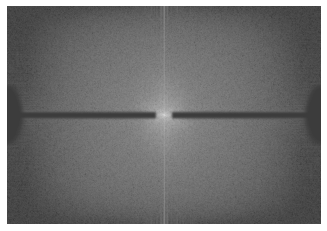

In [ ]:
disp(img_1_fourier_mask*mag_viz)

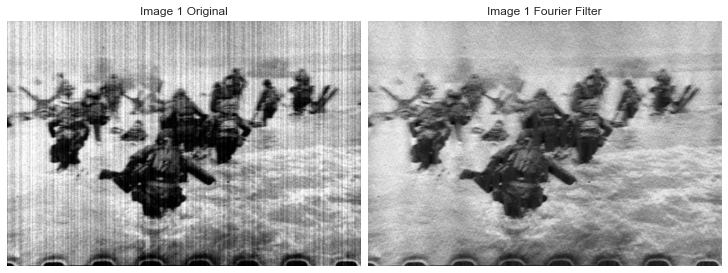

In [ ]:
img_1_fourier_filtered = apply_fourier_filter(img_1, img_1_fourier_mask)[:,:,0]
# cv2.imwrite("img_1_fourier_filtered.png", uint8ify(img_1_fourier_filtered))
before_after(img_1, img_1_fourier_filtered, "Image 1", effect_name="Fourier Filter")

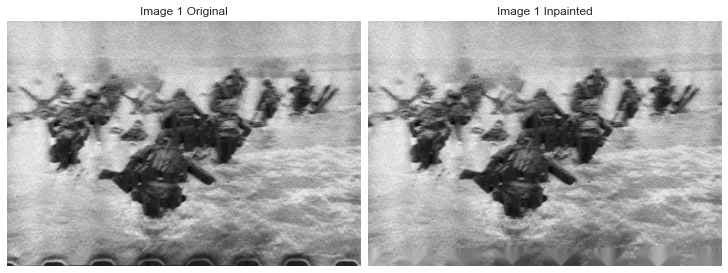

In [ ]:
img_1_inpainted = cv2.inpaint(uint8ify(img_1_fourier_filtered), uint8ify(1.0-img_1_mask), 3, cv2.INPAINT_TELEA)
before_after(img_1_fourier_filtered, img_1_inpainted, "Image 1", 0, 255, effect_name="Inpainted")

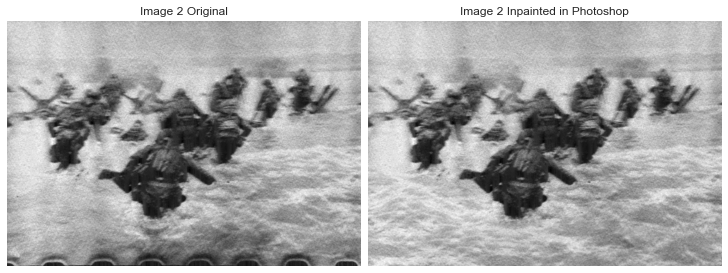

In [ ]:
# img_1_inpainted = cv2.inpaint(uint8ify(img_1_fourier_filtered), uint8ify(1.0-img_1_mask), 3, cv2.INPAINT_TELEA)
before_after(img_1_fourier_filtered, img_1_inpaint_ps, "Image 1", 0, 255, effect_name="Inpainted in Photoshop")

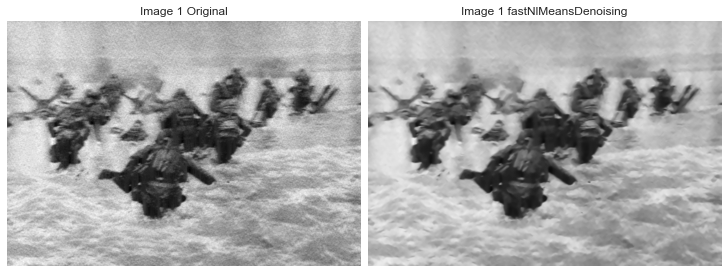

In [ ]:
img_1_denoised = cv2.fastNlMeansDenoising(img_1_inpaint_ps.astype(np.uint8), h=14, templateWindowSize=5, searchWindowSize=7)
before_after(img_1_inpaint_ps, img_1_denoised, "Image 1", vmin=0, vmax=255, effect_name="fastNlMeansDenoising")

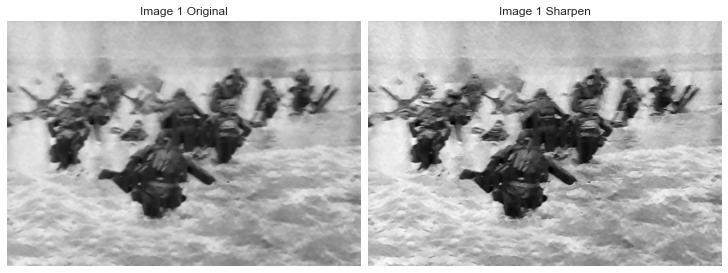

In [ ]:
kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
img_1_sharpen = cv2.filter2D(uint8ify(img_1_denoised.astype(np.float32)),-1, kernel)
cv2.addWeighted(uint8ify(img_1_denoised.astype(np.float32)), 0.75, uint8ify(img_1_sharpen.astype(np.float32)), 0.25, 0, img_1_sharpen)
before_after(img_1_denoised, uint8ify(img_1_sharpen.astype(np.float32)), "Image 1", vmin=0, vmax=255, effect_name="Sharpen")


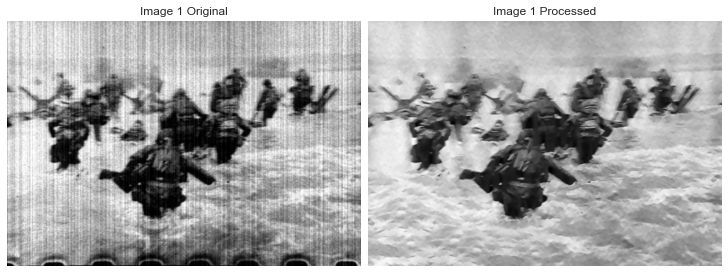

In [ ]:
before_after(img_1, img_1_sharpen, "Image 1", 0, 255, effect_name="Processed")

## img 2 🗿


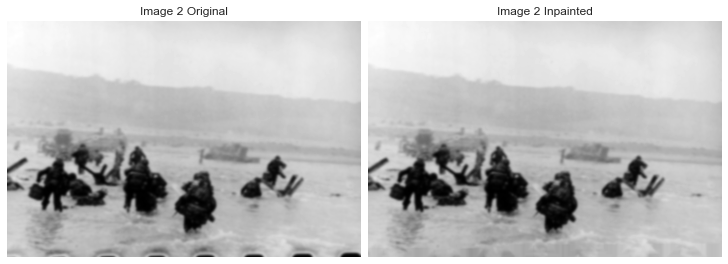

In [ ]:
# sharpen, inpaint
# disp(img_2, "Image 2 Original")
# inpaint image using a mask
img_2_inpainted = cv2.inpaint(uint8ify(img_2), uint8ify(1.0-img_2_mask), 3, cv2.INPAINT_NS)
before_after(img_2, img_2_inpainted, "Image 2", 0, 255, effect_name="Inpainted")

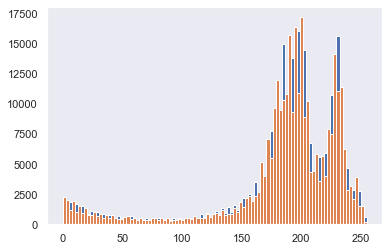

In [ ]:
plt.hist(img_2.ravel(), bins=100, range=(0,255));
plt.hist(img_2_inpainted.ravel(), bins=100, range=(0,255));

0.0 255.0


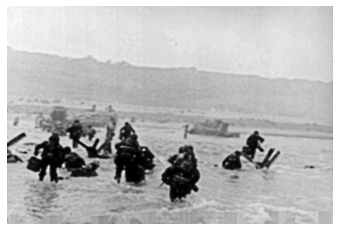

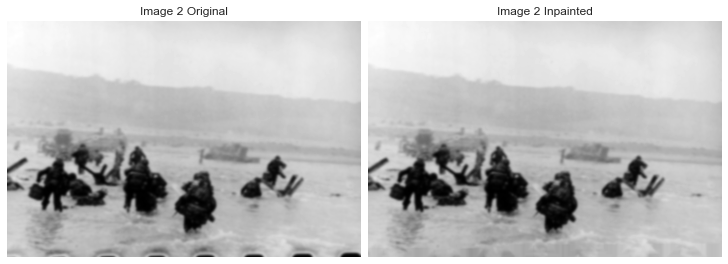

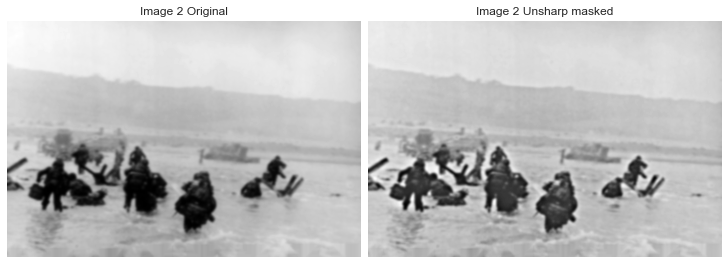

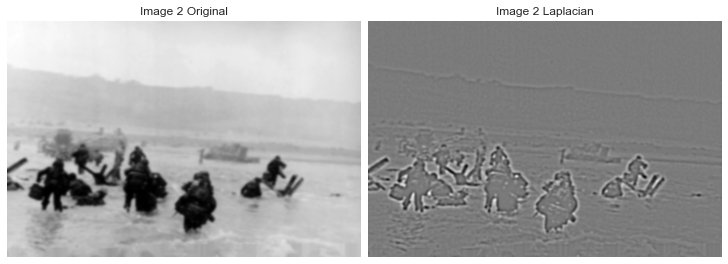

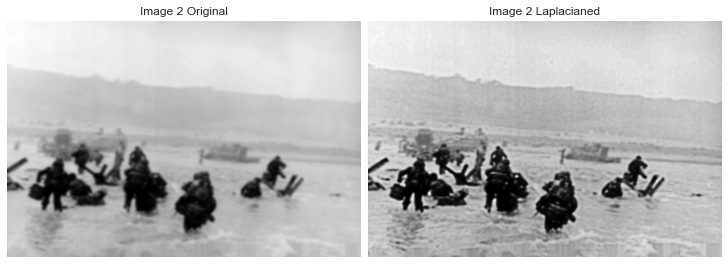

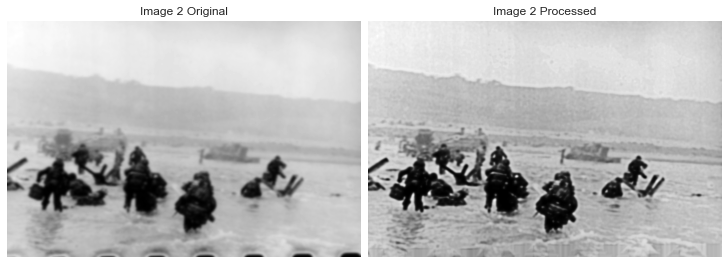

In [ ]:
img_2_inpainted = cv2.inpaint(uint8ify(img_2), uint8ify(1.0-img_2_mask), 3, cv2.INPAINT_NS).astype(np.float32)

img_2_blurred = cv2.GaussianBlur(img_2_inpainted, (101,101), sigmaX=8)
img_2_sharpen = 2*img_2_inpainted - img_2_blurred

img_2_Laplacian = cv2.Laplacian(img_2_inpainted.astype(np.float64), cv2.CV_64F, ksize=11)
img_2_Laplacian -= img_2_Laplacian.min()
img_2_Laplacian /= img_2_Laplacian.max()

img_2_sharpen2 = overlay(1.0-img_2_Laplacian, img_2_inpainted/255)

disp(img_2_sharpen2)
before_after(img_2, uint8ify(img_2_inpainted), "Image 2", 0, 255, effect_name="Inpainted")
before_after(uint8ify(img_2_inpainted), uint8ify(img_2_sharpen), "Image 2", vmin=0, vmax=255, effect_name="Unsharp masked")
before_after(uint8ify(img_2_inpainted), uint8ify(1.0-img_2_Laplacian), "Image 2", effect_name="Laplacian")
before_after(uint8ify(img_2_inpainted), uint8ify(img_2_sharpen2), "Image 2", effect_name="Laplacianed")
before_after(img_2, uint8ify(img_2_sharpen2.astype(np.float32)), "Image 2", vmin=0, vmax=255, effect_name="Processed")

## img 3 🗿

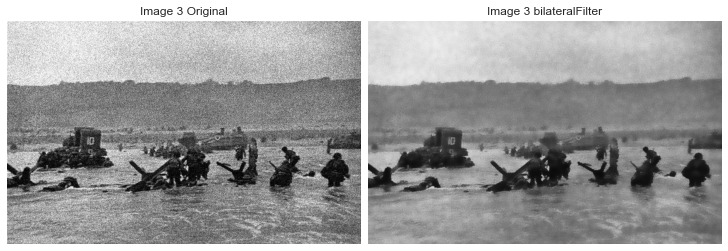

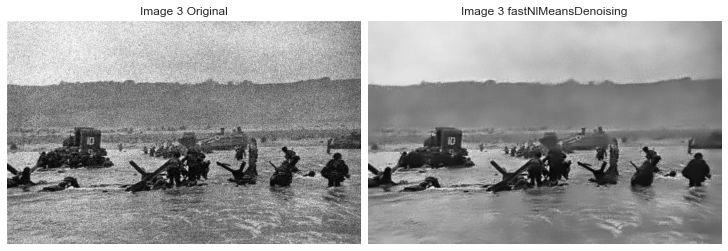

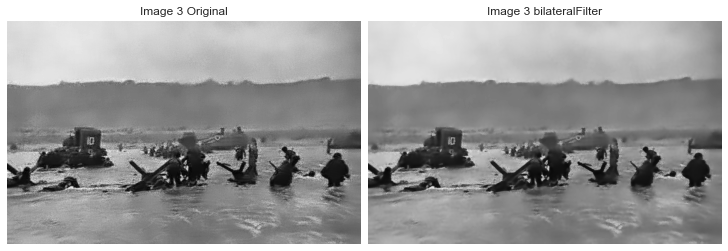

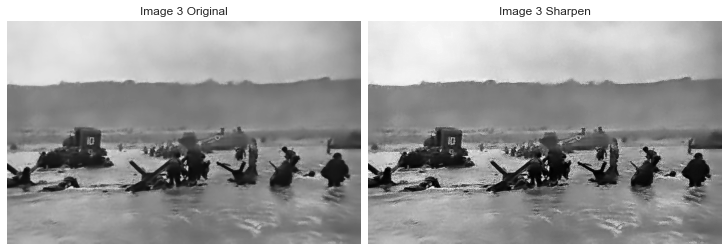

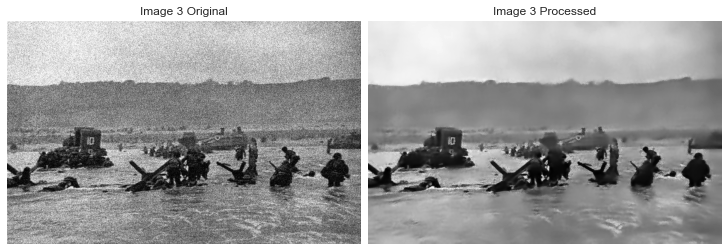

In [ ]:
# Denoise, sharpen

img_3_denoised =  cv2.bilateralFilter(img_3, 15, 50, 5)
before_after(img_3, img_3_denoised, "Image 3", vmin=0, vmax=255, effect_name="bilateralFilter")

img_3_denoised = cv2.fastNlMeansDenoising(img_3.astype(np.uint8), h=19, templateWindowSize=17, searchWindowSize=23)
before_after(img_3, img_3_denoised, "Image 3", vmin=0, vmax=255, effect_name="fastNlMeansDenoising")

img_3_denoised2 =  cv2.bilateralFilter(img_3_denoised, 7, 25, 5)
before_after(img_3_denoised, img_3_denoised2, "Image 3", vmin=0, vmax=255, effect_name="bilateralFilter")

# sharpen
kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
img_3_sharpen = cv2.filter2D(uint8ify(img_3_denoised2.astype(np.float32)),-1, kernel)
cv2.addWeighted(uint8ify(img_3_denoised2.astype(np.float32)), 0.75, uint8ify(img_3_sharpen.astype(np.float32)), 0.25, 0, img_3_sharpen)
before_after(img_3_denoised2, uint8ify(img_3_sharpen.astype(np.float32)), "Image 3", vmin=0, vmax=255, effect_name="Sharpen")
before_after(img_3, uint8ify(img_3_denoised2.astype(np.float32)), "Image 3", vmin=0, vmax=255, effect_name="Processed")

## img 4 🗿


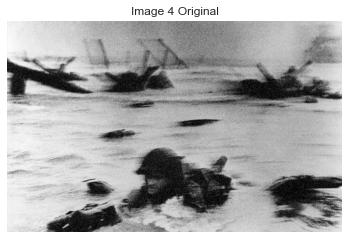

In [ ]:
# De-Motion Blur!
disp(img_4, "Image 4 Original")

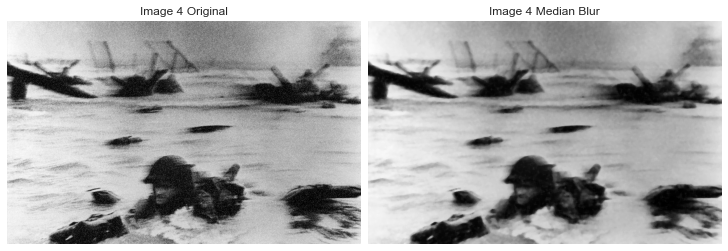

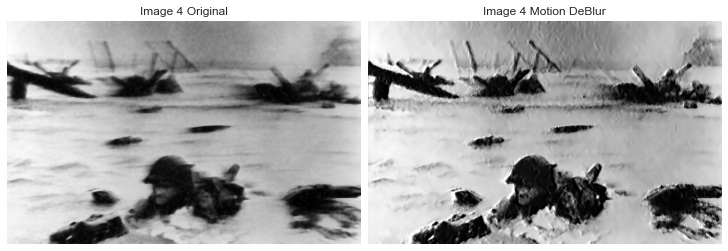

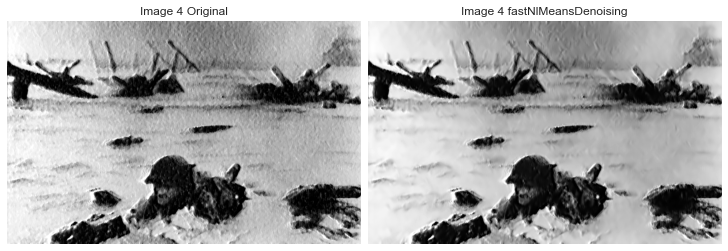

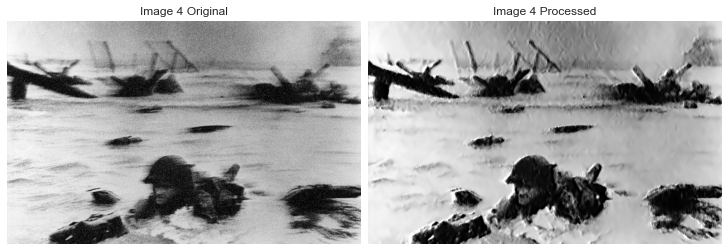

In [16]:
kernel = np.array([
    [1,0,-1],
    [2,1,-2],
    [1,0,-1],
])
denoised_4 = cv2.medianBlur(img_4, 5)
de_blur_4 = cv2.filter2D(uint8ify(denoised_4), ddepth=-1, kernel=kernel)
denoise_4 = cv2.fastNlMeansDenoising(de_blur_4, h=11, templateWindowSize=11, searchWindowSize=11)
before_after(img_4, uint8ify(denoised_4.astype(np.float32)), "Image 4", vmin=0, vmax=255, effect_name="Median Blur")
before_after(denoised_4, uint8ify(denoise_4.astype(np.float32)), "Image 4", vmin=0, vmax=255, effect_name="Motion DeBlur")
before_after(de_blur_4, uint8ify(denoise_4.astype(np.float32)), "Image 4", vmin=0, vmax=255, effect_name="fastNlMeansDenoising")
before_after(img_4, uint8ify(denoise_4.astype(np.float32)), "Image 4", vmin=0, vmax=255, effect_name="Processed")

## img 5 🗿


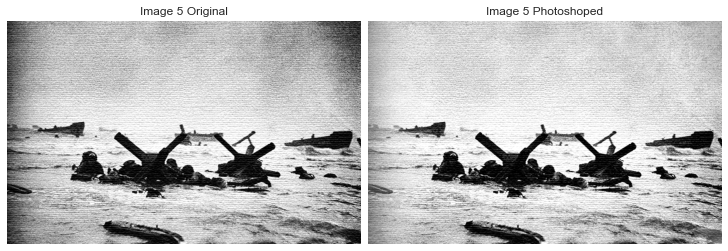

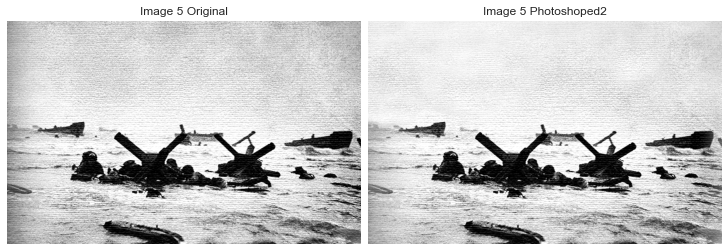

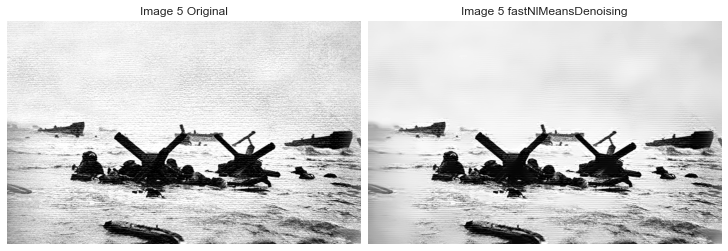

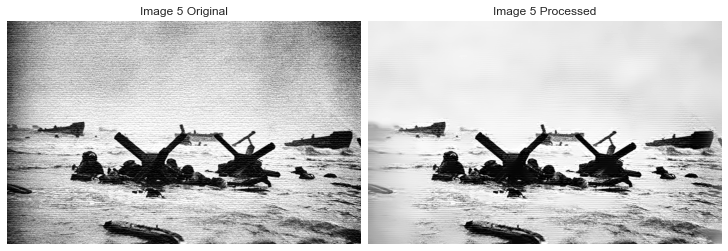

In [ ]:
before_after(img_5, img_5_ps, "Image 5", vmin=0, vmax=255, effect_name="Photoshoped")
before_after(img_5_ps, img_5_ps2, "Image 5", vmin=0, vmax=255, effect_name="Photoshoped2")

img_5_denoised = cv2.fastNlMeansDenoising(img_5_ps2.astype(np.uint8), h=13, templateWindowSize=17, searchWindowSize=29)
before_after(img_5_ps2, img_5_denoised, "Image 5", vmin=0, vmax=255, effect_name="fastNlMeansDenoising")

before_after(img_5, img_5_denoised, "Image 5", vmin=0, vmax=255, effect_name="Processed")


## img 6 🗿

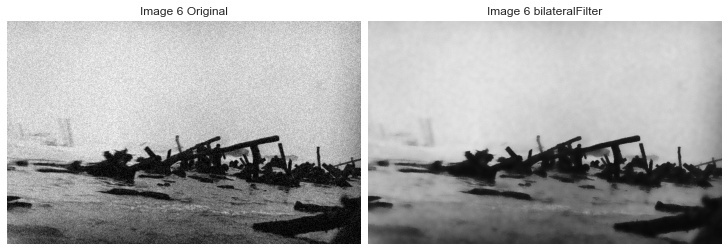

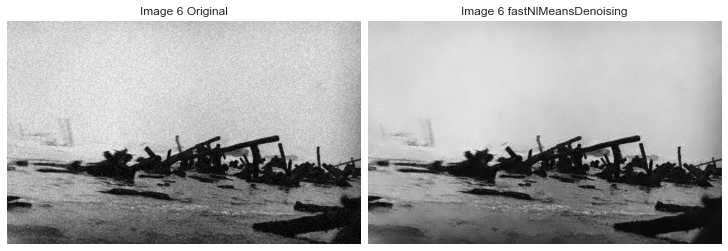

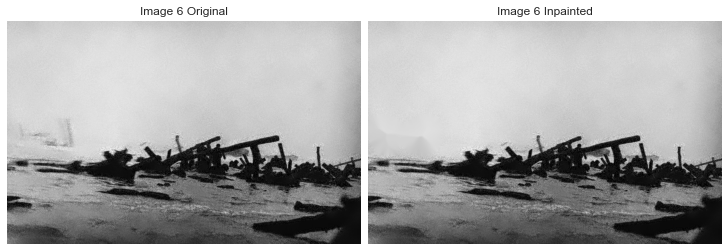

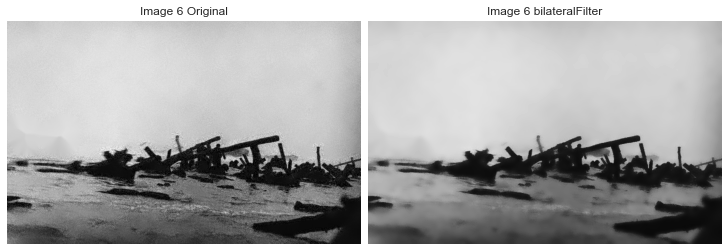

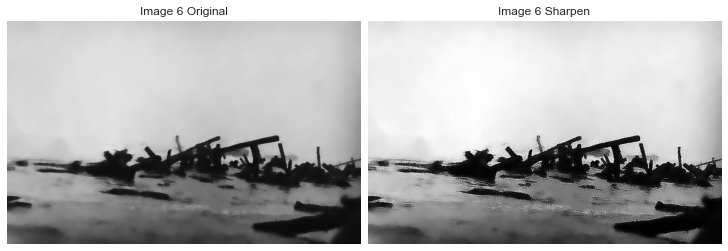

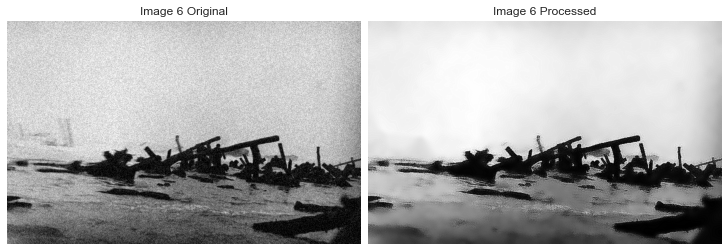

In [34]:
img_6_denoised =  cv2.bilateralFilter(img_6, 15, 50, 5)
before_after(img_6, img_6_denoised, "Image 6", vmin=0, vmax=255, effect_name="bilateralFilter")

img_6_denoised = cv2.fastNlMeansDenoising(img_6.astype(np.uint8), h=12, templateWindowSize=17, searchWindowSize=23)
before_after(img_6, img_6_denoised, "Image 6", vmin=0, vmax=255, effect_name="fastNlMeansDenoising")

img_6_inpainted = cv2.inpaint(uint8ify(img_6_denoised.astype(np.float32)), uint8ify(1.0-img_6_mask), 3, cv2.INPAINT_TELEA).astype(np.float32)
before_after(img_6_denoised, uint8ify(img_6_inpainted.astype(np.float32)), "Image 6", vmin=0, vmax=255, effect_name="Inpainted")

img_6_denoised2 =  cv2.bilateralFilter(img_6_inpainted, 15, 50, 5)
before_after(img_6_inpainted, img_6_denoised2, "Image 6", vmin=0, vmax=255, effect_name="bilateralFilter")

kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
img_6_sharpen = cv2.filter2D(uint8ify(img_6_denoised2.astype(np.float32)),-1, kernel)
cv2.addWeighted(uint8ify(img_6_denoised2.astype(np.float32)), 0.5, uint8ify(img_6_sharpen.astype(np.float32)), 0.5, 0, img_6_sharpen)
before_after(img_6_denoised2, uint8ify(img_6_sharpen.astype(np.float32)), "Image 6", vmin=0, vmax=255, effect_name="Sharpen")
before_after(img_6, uint8ify(img_6_sharpen.astype(np.float32)), "Image 6", vmin=0, vmax=255, effect_name="Processed")